In [1]:
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
import seaborn as sns
from pathlib import Path
from IPython.display import display, Markdown

In [2]:
def print_files(data_path: Path):
    files = data_path.glob('*.csv')
    for file in files:
        print(file.name)

In [3]:
data_path = Path('../data/')
print_files(data_path)

client.csv
electricity_prices.csv
gas_prices.csv
historical_weather.csv
train.csv
weather_station_to_county_mapping.csv


# Carga de los datos

In [4]:
def load_data(data_path: Path) -> dict[str, pl.DataFrame]:
    files = data_path.glob('*.csv')
    data_dict = dict()

    for file in files:
        file_name = file.stem
        file_path = file.resolve()

        if 'weather_station' in file_name:
            file_name = 'weather_station'
        
        data_dict[file_name] = pl.read_csv(file_path, try_parse_dates=True)
    
    return data_dict

In [5]:
data_dict = load_data(data_path)

# Descripción de los datos

In [6]:
def print_categories(df: pl.DataFrame, cat_cols: list[str]):
    cols = list(set(cat_cols).intersection(df.columns))

    display(Markdown('#### Categorías:'))
    if cols:   
        for col in cols:
            display(Markdown(f'{col}:'))
            print(df[col].unique().to_list())
    else:
        display(Markdown('Sin columnas categóricas.'))


In [10]:
def print_correlations(df: pl.DataFrame, exclude: set[list]):
    display(Markdown('Correlations:'))
    display(
        df.select(
            pl.col(pl.Int64, pl.Float64).exclude(categorical_columns)
        ).corr().to_pandas()
    )

In [11]:
categorical_columns = [
    'county',
    'product_type',
    'is_business',
    'county_name',
    'is_consumption'
]

In [12]:
# Display DataFrames
for table in data_dict.keys():
    tmp_df = data_dict[table]
    # Data visualization
    display(Markdown(f'### **{table}:**'))
    display(tmp_df.head())
    display(Markdown(f'shape: {tmp_df.shape}'))

    # Data Statistics
    display(Markdown('#### Estadísticas:'))
    display(tmp_df.describe())

    # Categorical columns
    print_categories(tmp_df, categorical_columns)

    # Correlations
    print_correlations(tmp_df, categorical_columns)

### **client:**

product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
i64,i64,i64,f64,i64,date,i64
1,0,108,952.89,0,2021-09-01,2
2,0,17,166.4,0,2021-09-01,2
3,0,688,7207.88,0,2021-09-01,2
0,0,5,400.0,1,2021-09-01,2
1,0,43,1411.0,1,2021-09-01,2


shape: (41919, 7)

#### Estadísticas:

statistic,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
str,f64,f64,f64,f64,f64,str,f64
"""count""",41919.0,41919.0,41919.0,41919.0,41919.0,"""41919""",41919.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,"""0""",0.0
"""mean""",1.898996,7.297097,73.345118,1450.771451,0.536773,"""2022-07-18 21:34:22.921000""",322.898876
"""std""",1.081713,4.78075,144.064389,2422.23312,0.498652,null,182.075724
"""min""",0.0,0.0,5.0,5.5,0.0,"""2021-09-01""",2.0
"""25%""",1.0,3.0,13.0,321.9,0.0,"""2022-02-13""",167.0
"""50%""",2.0,7.0,32.0,645.2,1.0,"""2022-07-20""",324.0
"""75%""",3.0,11.0,70.0,1567.15,1.0,"""2022-12-23""",480.0
"""max""",3.0,15.0,1517.0,19314.31,1.0,"""2023-05-29""",637.0


#### Categorías:

county:

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


is_business:

[0, 1]


product_type:

[0, 1, 2, 3]


Correlations:

,eic_count,installed_capacity,data_block_id
0,1.000000,0.754353,0.119872
1,0.754353,1.000000,0.110381
2,0.119872,0.110381,1.000000


### **electricity_prices:**

forecast_date,euros_per_mwh,origin_date,data_block_id
datetime[μs],f64,datetime[μs],i64
2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
2021-09-01 01:00:00,88.9,2021-08-31 01:00:00,1
2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


shape: (15286, 4)

#### Estadísticas:

statistic,forecast_date,euros_per_mwh,origin_date,data_block_id
str,str,f64,str,f64
"""count""","""15286""",15286.0,"""15286""",15286.0
"""null_count""","""0""",0.0,"""0""",0.0
"""mean""","""2022-07-16 11:16:41.857909""",157.064176,"""2022-07-15 11:16:41.857909""",318.99071
"""std""",null,121.148625,null,183.890301
"""min""","""2021-09-01 00:00:00""",-10.06,"""2021-08-31 00:00:00""",1.0
"""25%""","""2022-02-07 05:00:00""",85.29,"""2022-02-06 05:00:00""",160.0
"""50%""","""2022-07-16 12:00:00""",128.28,"""2022-07-15 12:00:00""",319.0
"""75%""","""2022-12-22 17:00:00""",199.8,"""2022-12-21 17:00:00""",478.0
"""max""","""2023-05-30 23:00:00""",4000.0,"""2023-05-29 23:00:00""",637.0


#### Categorías:

Sin columnas categóricas.

Correlations:

,euros_per_mwh,data_block_id
0,1.000000,-0.026326
1,-0.026326,1.000000


### **gas_prices:**

forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
date,f64,f64,date,i64
2021-09-01,45.23,46.32,2021-08-31,1
2021-09-02,45.62,46.29,2021-09-01,2
2021-09-03,45.85,46.4,2021-09-02,3
2021-09-04,46.3,46.8,2021-09-03,4
2021-09-05,46.3,46.58,2021-09-04,5


shape: (637, 5)

#### Estadísticas:

statistic,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
str,str,f64,f64,str,f64
"""count""","""637""",637.0,637.0,"""637""",637.0
"""null_count""","""0""",0.0,0.0,"""0""",0.0
"""mean""","""2022-07-16 00:00:00""",95.03675,107.754631,"""2022-07-15 00:00:00""",319.0
"""std""",null,47.552295,54.743666,null,184.030342
"""min""","""2021-09-01""",28.1,34.0,"""2021-08-31""",1.0
"""25%""","""2022-02-07""",60.0,67.53,"""2022-02-06""",160.0
"""50%""","""2022-07-16""",85.21,93.47,"""2022-07-15""",319.0
"""75%""","""2022-12-22""",109.0,130.74,"""2022-12-21""",478.0
"""max""","""2023-05-30""",250.0,305.0,"""2023-05-29""",637.0


#### Categorías:

Sin columnas categóricas.

Correlations:

,lowest_price_per_mwh,highest_price_per_mwh,data_block_id
0,1.000000,0.981314,-0.040145
1,0.981314,1.000000,-0.002705
2,-0.040145,-0.002705,1.000000


### **historical_weather:**

datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
datetime[μs],f64,f64,f64,f64,f64,i64,i64,i64,i64,f64,i64,f64,f64,f64,f64,f64,f64
2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0
2021-09-01 00:00:00,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,5.111111,359,0.0,0.0,0.0,57.6,22.2,1.0
2021-09-01 00:00:00,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,6.333333,355,0.0,0.0,0.0,57.6,22.7,1.0
2021-09-01 00:00:00,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0
2021-09-01 00:00:00,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,8.416667,5,0.0,0.0,0.0,57.6,23.7,1.0


shape: (1710802, 18)

#### Estadísticas:

statistic,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""1710802""",1.710802e6,1.710802e6,1.710802e6,1.710802e6,1.710802e6,1.710802e6,1.710802e6,1.710802e6,1.710802e6,1.710802e6,1.710802e6,1.710802e6,1.710802e6,1.710802e6,1.710802e6,1.710802e6,1.710802e6
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""","""2022-07-16 05:00:12.061711""",5.740968,2.240312,0.04962,0.016049,1009.281515,60.912696,46.685927,34.40698,36.051408,4.849871,197.869419,106.490504,64.452917,42.037587,58.649999,24.949999,319.270778
"""std""",null,8.025647,7.224357,0.207911,0.074629,13.088915,37.769048,40.747598,38.327693,41.358521,2.47545,89.937978,179.944912,133.409951,61.952251,0.687387,2.015564,183.729798
"""min""","""2021-09-01 00:00:00""",-23.7,-25.9,0.0,0.0,942.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.6,21.7,1.0
"""25%""","""2022-02-07 02:00:00""",0.0,-2.6,0.0,0.0,1001.5,25.0,3.0,0.0,0.0,3.0,139.0,0.0,0.0,0.0,57.9,23.2,160.0
"""50%""","""2022-07-16 05:00:00""",5.1,1.7,0.0,0.0,1010.4,72.0,39.0,16.0,10.0,4.5,208.0,1.0,0.0,1.0,58.5,24.7,319.0
"""75%""","""2022-12-22 08:00:00""",11.2,7.2,0.0,0.0,1018.0,100.0,94.0,72.0,85.0,6.277778,263.0,140.0,47.0,74.0,59.1,26.7,478.0
"""max""","""2023-05-30 10:00:00""",32.6,23.8,16.8,2.66,1049.3,100.0,100.0,100.0,100.0,21.75,360.0,849.0,754.0,388.0,59.7,28.2,637.0


#### Categorías:

Sin columnas categóricas.

Correlations:

,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,1.000000,0.932826,0.117469,-0.188817,0.108984,-0.274801,-0.348149,-0.123345,0.010232,-0.054503,0.031014,0.448535,0.419212,0.400059,-0.023109,-8.930361e-02,-1.710311e-02
1,0.932826,1.000000,0.183479,-0.151717,0.027504,-0.146175,-0.199881,-0.067964,0.056985,-0.035742,0.067949,0.245328,0.218748,0.241515,-0.012916,-1.058830e-01,-5.603278e-02
2,0.117469,0.183479,1.000000,-0.002668,-0.173514,0.188819,0.146022,0.266776,0.151844,0.114598,-0.001668,-0.033264,-0.055839,0.023629,-0.004645,-5.169818e-03,-3.421934e-02
3,-0.188817,-0.151717,-0.002668,1.000000,-0.257111,0.210455,0.215334,0.315405,0.158039,0.142666,-0.008854,-0.105201,-0.099027,-0.092315,0.006490,2.734272e-02,1.624558e-02
4,0.108984,0.027504,-0.173514,-0.257111,1.000000,-0.337567,-0.283840,-0.343643,-0.158701,-0.198898,-0.065881,0.144627,0.166921,0.060627,0.073101,-2.081593e-01,8.090565e-02
5,-0.274801,-0.146175,0.188819,0.210455,-0.337567,1.000000,0.839190,0.633825,0.437592,0.176693,0.010764,-0.294352,-0.365561,-0.067756,-0.005311,7.505867e-02,-3.874790e-02
6,-0.348149,-0.199881,0.146022,0.215334,-0.283840,0.839190,1.000000,0.325426,0.139035,0.148048,0.002224,-0.319044,-0.351790,-0.169133,-0.005643,7.736866e-02,-5.007015e-02
7,-0.123345,-0.067964,0.266776,0.315405,-0.343643,0.633825,0.325426,1.000000,0.451237,0.178359,0.008718,-0.153572,-0.204507,-0.005670,0.000646,5.335170e-02,1.660490e-02
8,0.010232,0.056985,0.151844,0.158039,-0.158701,0.437592,0.139035,0.451237,1.000000,0.125372,0.017386,-0.089257,-0.136722,0.035166,0.006195,-4.931478e-04,2.201851e-02
9,-0.054503,-0.035742,0.114598,0.142666,-0.198898,0.176693,0.148048,0.178359,0.125372,1.000000,0.011507,-0.068603,-0.078684,-0.029824,0.074656,-3.199888e-01,-1.145911e-01


### **train:**

county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
i64,i64,i64,f64,i64,datetime[μs],i64,i64,i64
0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
0,0,1,96.59,1,2021-09-01 00:00:00,0,1,0
0,0,2,0.0,0,2021-09-01 00:00:00,0,2,1
0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


shape: (2018352, 9)

#### Estadísticas:

statistic,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
str,f64,f64,f64,f64,f64,str,f64,f64,f64
"""count""",2.018352e6,2.018352e6,2.018352e6,2.017824e6,2.018352e6,"""2018352""",2.018352e6,2.018352e6,2.018352e6
"""null_count""",0.0,0.0,0.0,528.0,0.0,"""0""",0.0,0.0,0.0
"""mean""",7.297034,0.536826,1.898927,274.85556,0.5,"""2022-07-20 08:29:25.326167""",321.874599,1009175.5,33.045376
"""std""",4.78099,0.498642,1.081766,909.502378,0.5,null,182.634314,582648.179597,19.590594
"""min""",0.0,0.0,0.0,0.0,0.0,"""2021-09-01 00:00:00""",0.0,0.0,0.0
"""25%""",3.0,0.0,1.0,0.378,0.0,"""2022-02-14 04:00:00""",166.0,504588.0,16.0
"""50%""",7.0,1.0,2.0,31.133,1.0,"""2022-07-21 10:00:00""",323.0,1.009176e6,33.0
"""75%""",11.0,1.0,3.0,180.206,1.0,"""2022-12-24 14:00:00""",479.0,1.513763e6,50.0
"""max""",15.0,1.0,3.0,15480.274,1.0,"""2023-05-31 23:00:00""",637.0,2.018351e6,68.0


#### Categorías:

is_consumption:

[0, 1]


county:

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


is_business:

[0, 1]


product_type:

[0, 1, 2, 3]


Correlations:

,target,data_block_id,row_id,prediction_unit_id
0,NaN,NaN,NaN,NaN
1,NaN,1.000000,0.999957,0.033846
2,NaN,0.999957,1.000000,0.033596
3,NaN,0.033846,0.033596,1.000000


### **weather_station:**

county_name,longitude,latitude,county
str,f64,f64,i64
null,21.7,57.6,null
null,21.7,57.9,null
null,21.7,58.2,null
null,21.7,58.5,null
null,21.7,58.8,null


shape: (112, 4)

#### Estadísticas:

statistic,county_name,longitude,latitude,county
str,str,f64,f64,f64
"""count""","""49""",112.0,112.0,49.0
"""null_count""","""63""",0.0,0.0,63.0
"""mean""",null,24.95,58.65,7.061224
"""std""",null,2.024623,0.690476,4.870866
"""min""","""Harjumaa""",21.7,57.6,0.0
"""25%""",null,23.2,58.2,3.0
"""50%""",null,25.2,58.8,7.0
"""75%""",null,26.7,59.1,11.0
"""max""","""Võrumaa""",28.2,59.7,15.0


#### Categorías:

county:

[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15]


county_name:

['Põlvamaa', 'Valgamaa', 'Võrumaa', 'Jõgevamaa', 'Hiiumaa', 'Lääne-Virumaa', 'Saaremaa', 'Järvamaa', 'Tartumaa', 'Viljandimaa', 'Pärnumaa', 'Läänemaa', 'Raplamaa', 'Harjumaa', None, 'Ida-Virumaa']


Correlations:

,longitude,latitude
0,1.000000e+00,2.289521e-18
1,2.289521e-18,1.000000e+00


<Axes: xlabel='datetime', ylabel='temperature_hw'>

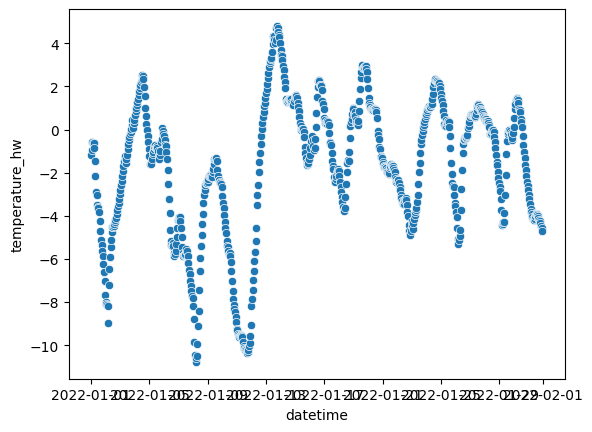

In [43]:
client_1 = df.filter(
    (pl.col('client_id') == 1) & 
    (pl.col('is_consumption') == 1) &
    (pl.col('year') == 2022) &
    (pl.col('month') == 1)
)
sns.scatterplot(x=client_1['datetime'], y=client_1['temperature_hw'])